<a href="https://colab.research.google.com/github/techbrothers3/Coffee-Tasting-EDA/blob/main/Cofee_Tasting_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('/content/drive/MyDrive/GACTT_RESULTS_ANONYMIZED_v2.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 113 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(92)
memory usage: 3.5+ MB


In [8]:
#lets view the list of columns in df
df.columns

Index(['Submission ID', 'What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home?',
       ...
       'Approximately how much have you spent on coffee equipment in the past 5 years?',
       'Do you feel like you’re getting good value for your money with regards to your coffee equipment?',
       'Gender', 'Gender (please specify)', 'Education Level',
       'Ethnicity/Race', 'Ethnicity/Race (please specify)',
       'Employment Status', 'Number of Children', 'Political Affiliation'],
      dtype='object', length=113)

Data preparation and cleaning

In [9]:
df.head(5)

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Dropping SubmissionId column as it is not useful
df.drop('Submission ID', inplace=True, axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 112 entries, What is your age? to Political Affiliation
dtypes: float64(21), object(91)
memory usage: 3.5+ MB


In [12]:
df.isnull().sum()

What is your age?                                            31
How many cups of coffee do you typically drink per day?      93
Where do you typically drink coffee?                         70
Where do you typically drink coffee? (At home)               67
Where do you typically drink coffee? (At the office)         67
                                                           ... 
Ethnicity/Race                                              624
Ethnicity/Race (please specify)                            3937
Employment Status                                           623
Number of Children                                          636
Political Affiliation                                       753
Length: 112, dtype: int64

In [13]:
# we see that there are lot of null values in few columns
# we keep the columns with less than 10% null data
threshold = 0.9 * len(df)
df.dropna(axis=1, thresh=threshold, inplace = True)


In [14]:
# similarly we keep the rows with less than 10% null data
threshold = 0.9 * len(df.columns)
df.dropna(axis=0, thresh=threshold, inplace=True)

df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 46 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   What is your age?                                                                            3446 non-null   object 
 1   How many cups of coffee do you typically drink per day?                                      3441 non-null   object 
 2   Where do you typically drink coffee?                                                         3446 non-null   object 
 3   Where do you typically drink coffee? (At home)                                               3446 non-null   object 
 4   Where do you typically drink coffee? (At the office)                                         3446 non-null   object 
 5   Where do you typically drink coffe

In [16]:
# converting the column with mostly numeric values
df['How many cups of coffee do you typically drink per day?'].unique()

array(['3', '1', '2', 'More than 4', '4', 'Less than 1', nan],
      dtype=object)

In [17]:
df['How many cups of coffee do you typically drink per day?'].replace('Less than 1', '0', inplace=True)

In [18]:
df['How many cups of coffee do you typically drink per day?'].replace('More than 4', '6', inplace=True)

In [19]:
df['How many cups of coffee do you typically drink per day?'].unique()

array(['3', '1', '2', '6', '4', '0', nan], dtype=object)

In [20]:
df['How many cups of coffee do you typically drink per day?'] = pd.to_numeric(df['How many cups of coffee do you typically drink per day?'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 46 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   What is your age?                                                                            3446 non-null   object 
 1   How many cups of coffee do you typically drink per day?                                      3441 non-null   float64
 2   Where do you typically drink coffee?                                                         3446 non-null   object 
 3   Where do you typically drink coffee? (At home)                                               3446 non-null   object 
 4   Where do you typically drink coffee? (At the office)                                         3446 non-null   object 
 5   Where do you typically drink coffe

In [22]:
print(df.isnull().sum())

What is your age?                                                                               0
How many cups of coffee do you typically drink per day?                                         5
Where do you typically drink coffee?                                                            0
Where do you typically drink coffee? (At home)                                                  0
Where do you typically drink coffee? (At the office)                                            0
Where do you typically drink coffee? (On the go)                                                0
Where do you typically drink coffee? (At a cafe)                                                0
Where do you typically drink coffee? (None of these)                                            0
How do you brew coffee at home?                                                                 3
How do you brew coffee at home? (Pour over)                                                     0
How do you brew coff

In [23]:
# checking for outliers
df.describe()

,How many cups of coffee do you typically drink per day?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
count,3441.000000,3445.000000,3446.000000,3436.000000,3440.000000,3445.000000,3439.000000,3443.000000,3444.000000,3434.000000,3441.000000,3445.000000,3443.000000,3438.000000
mean,1.800349,5.814514,2.132037,3.647555,3.321802,3.015094,2.209945,3.068254,3.079559,2.354688,3.067713,2.149782,3.862039,3.403141
std,1.028354,1.851050,0.946297,0.977802,1.183728,0.994937,0.860959,1.111579,1.000465,0.914331,1.133684,1.072666,1.001665,1.452101
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000
50%,2.000000,6.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,2.000000,7.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,6.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
# total null data in a dataframe
df.isnull().sum().sum()

110

In [25]:
df.ffill(inplace=True)

In [39]:
boolVal = df['How do you brew coffee at home? (Pour over)'].unique()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 46 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   What is your age?                                                                            3446 non-null   object 
 1   How many cups of coffee do you typically drink per day?                                      3446 non-null   float64
 2   Where do you typically drink coffee?                                                         3446 non-null   object 
 3   Where do you typically drink coffee? (At home)                                               3446 non-null   bool   
 4   Where do you typically drink coffee? (At the office)                                         3446 non-null   bool   
 5   Where do you typically drink coffe

In [95]:
df.drop('How do you brew coffee at home?', axis=1, inplace=True)
for column in df.columns:
  unique_values = df[column].unique()
  # Check if unique values match boolVal
  if (set(unique_values) == set(boolVal)):
    df[column] = df[column].astype(bool)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 45 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   What is your age?                                                                            3446 non-null   object 
 1   How many cups of coffee do you typically drink per day?                                      3446 non-null   float64
 2   Where do you typically drink coffee?                                                         3446 non-null   object 
 3   Where do you typically drink coffee? (At home)                                               3446 non-null   bool   
 4   Where do you typically drink coffee? (At the office)                                         3446 non-null   bool   
 5   Where do you typically drink coffe

In [96]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
string_columns = df.select_dtypes(include=['object']).columns
boolean_columns = df.select_dtypes(include=['bool']).columns

In [97]:
df.head()

,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),...,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?"
0,<18 years old,3.0,"At home, At the office, At a cafe",True,True,False,True,False,True,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Coffee A,Coffee D,Coffee B
1,25-34 years old,1.0,"At home, At the office, On the go",True,True,True,False,False,True,False,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Coffee A,Coffee A,Coffee B
2,45-54 years old,2.0,"At home, At the office, At a cafe, On the go",True,True,True,True,False,True,True,...,5.0,4.0,3.0,3.0,5.0,2.0,3.0,Coffee B,Coffee A,Coffee B
3,>65 years old,1.0,At home,True,False,False,False,False,False,False,...,3.0,4.0,3.0,3.0,4.0,3.0,4.0,Coffee C,Coffee D,Coffee C
4,25-34 years old,2.0,"At home, At the office",True,True,False,False,False,True,False,...,4.0,1.0,4.0,4.0,2.0,4.0,4.0,Coffee A,Coffee A,Coffee A


Data Visualization

---



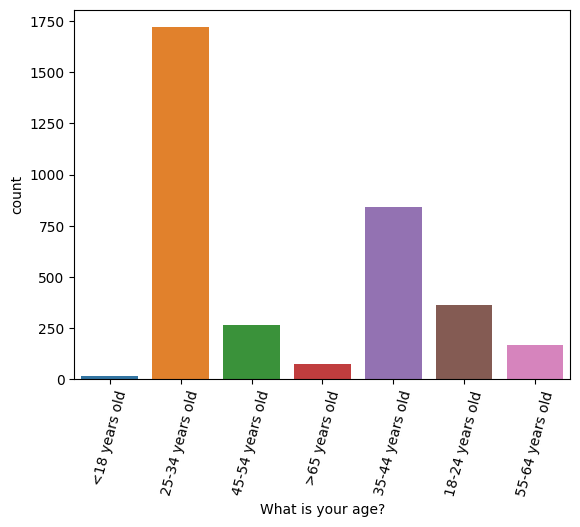

In [98]:
sns.countplot(x = 'What is your age?',data=df)
plt.xticks(rotation=75);

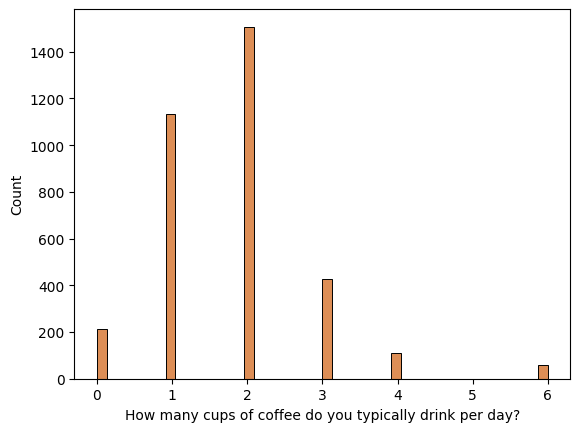

In [99]:
sns.histplot(df['How many cups of coffee do you typically drink per day?'], color = 'chocolate');

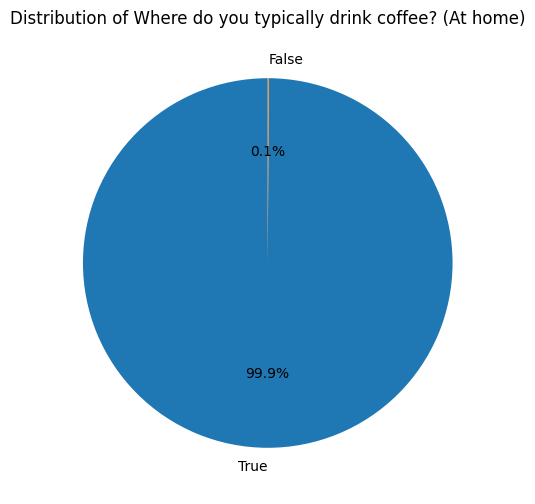

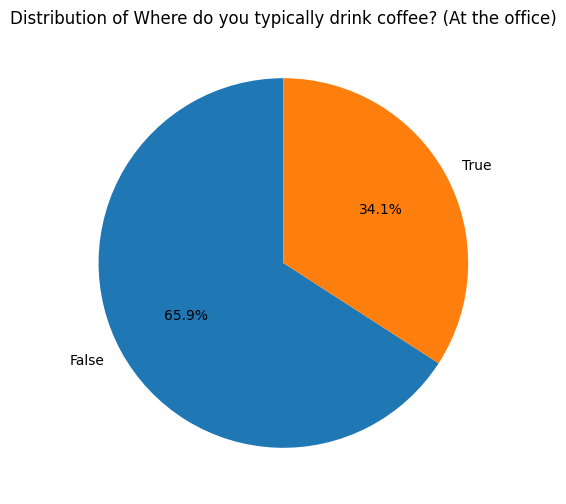

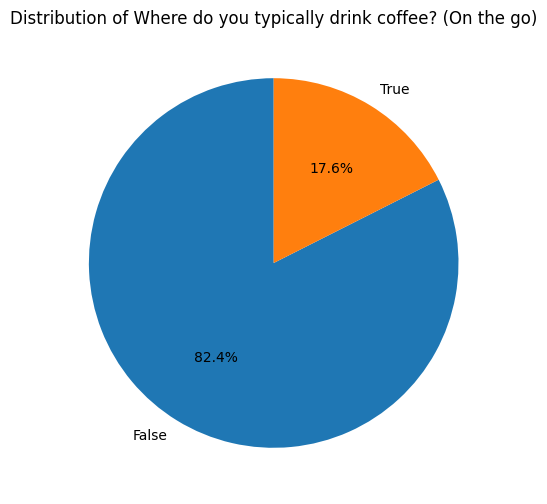

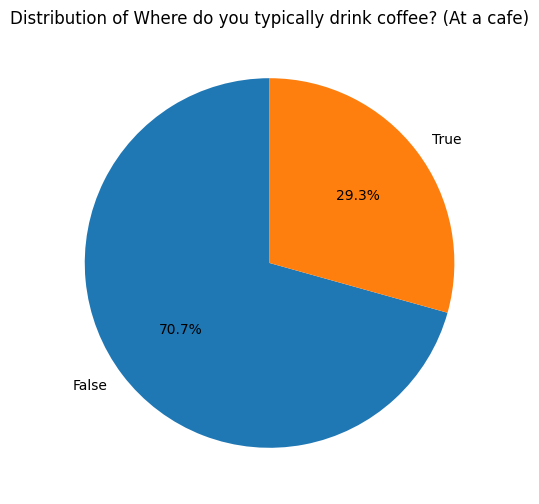

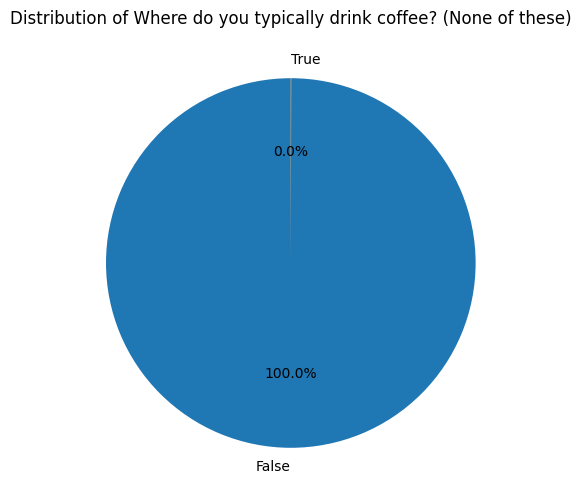

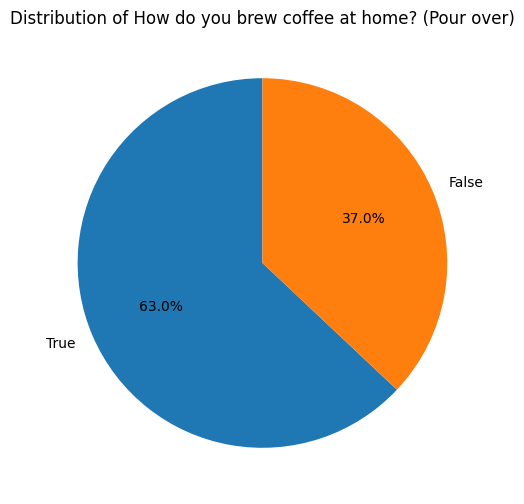

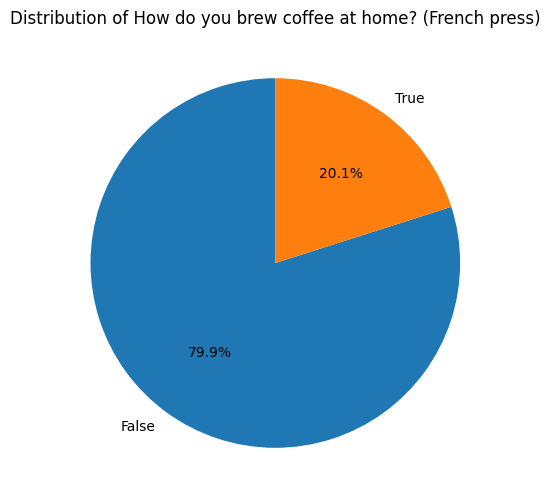

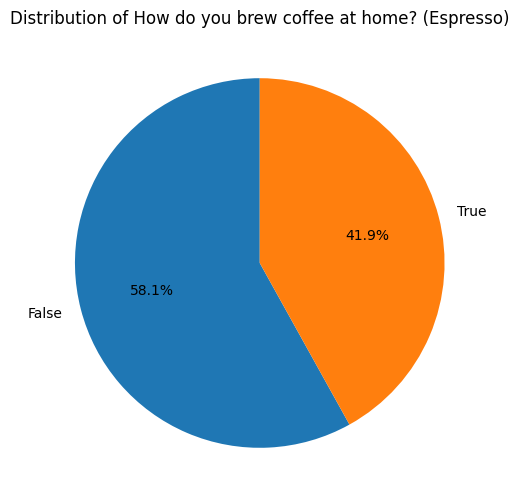

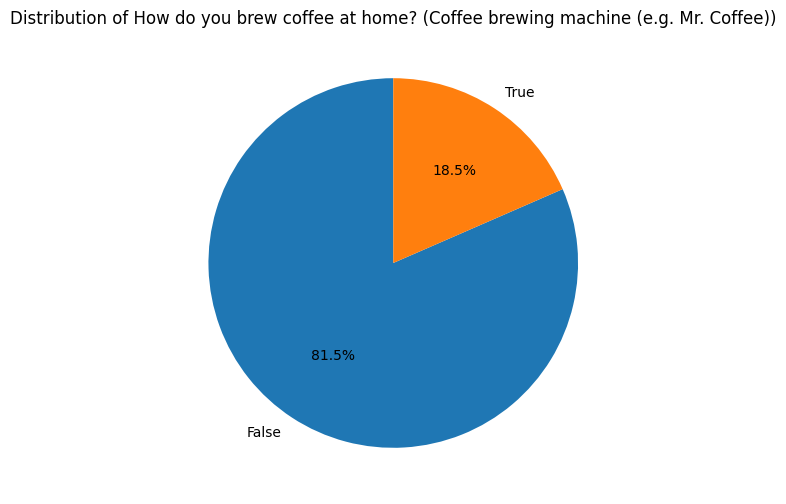

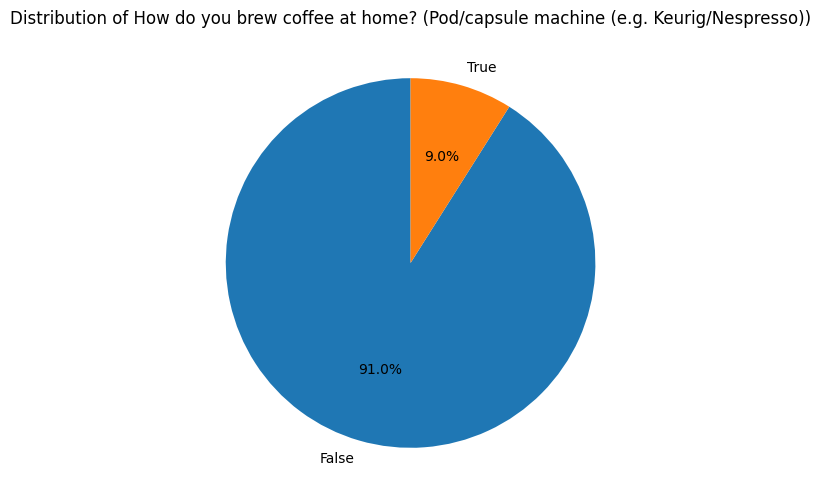

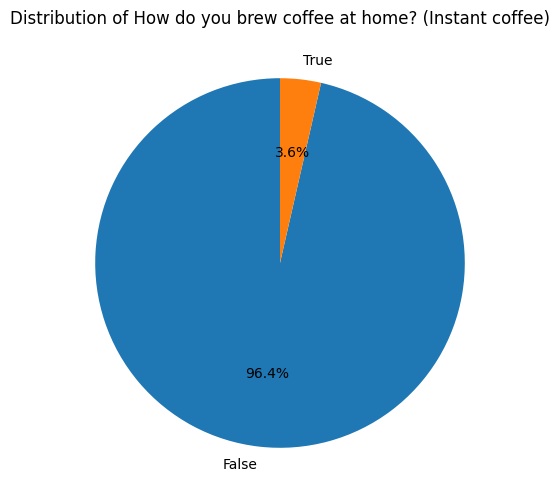

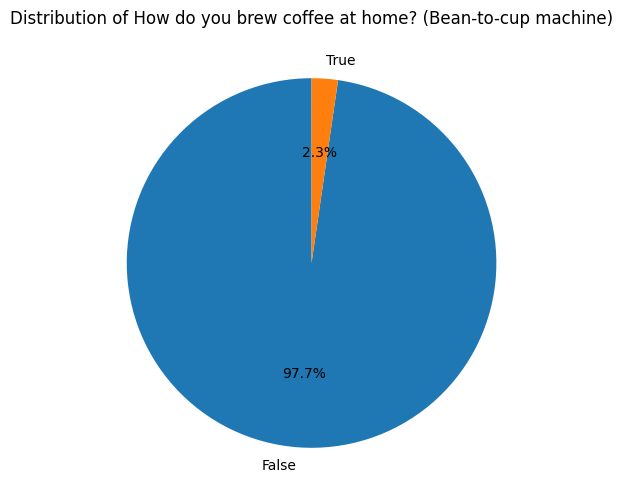

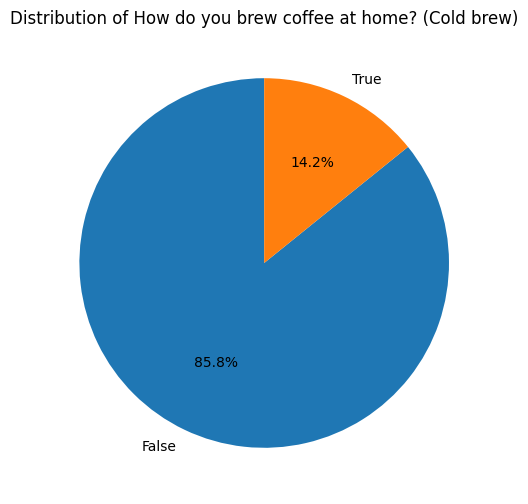

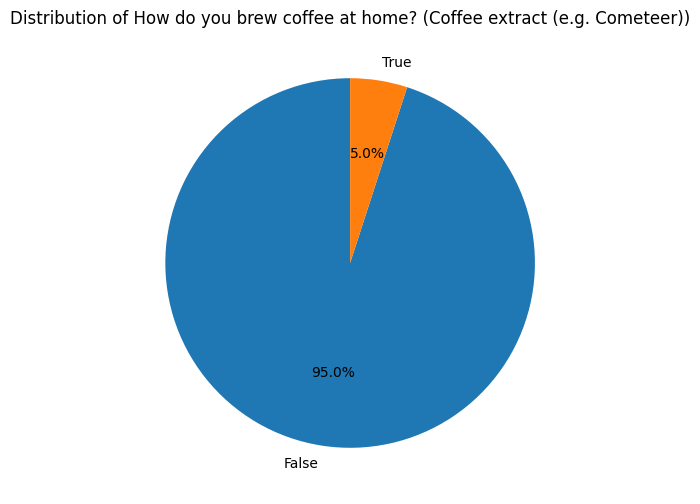

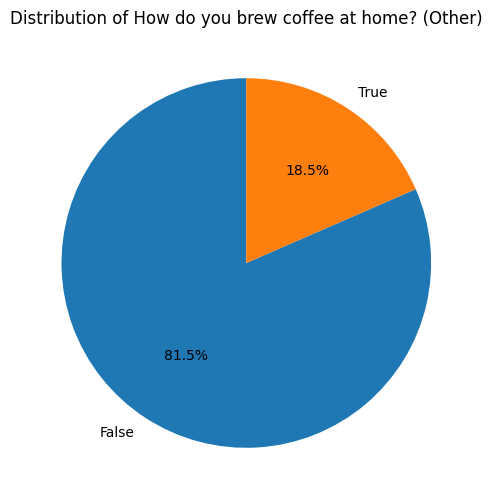

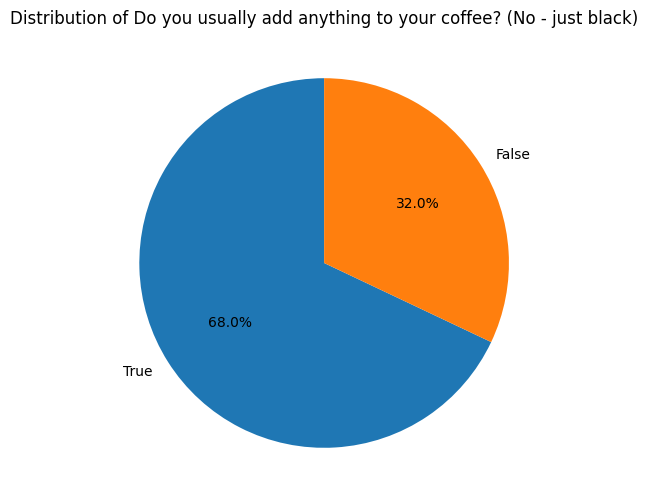

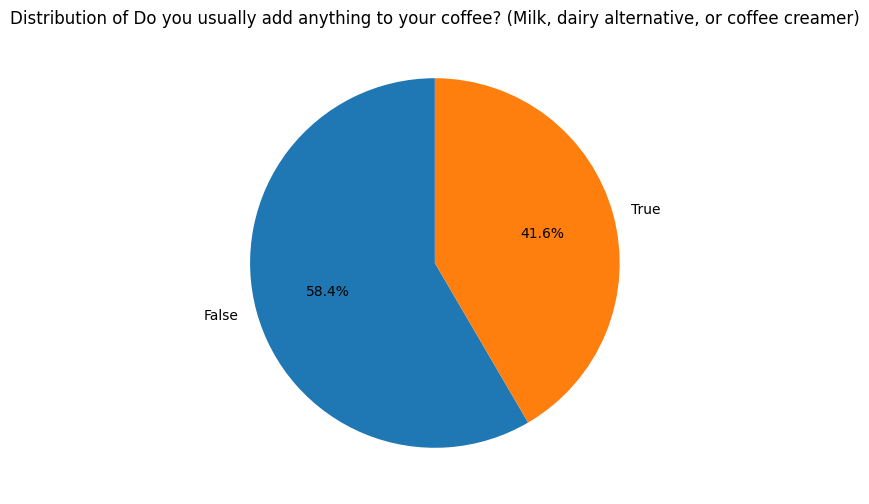

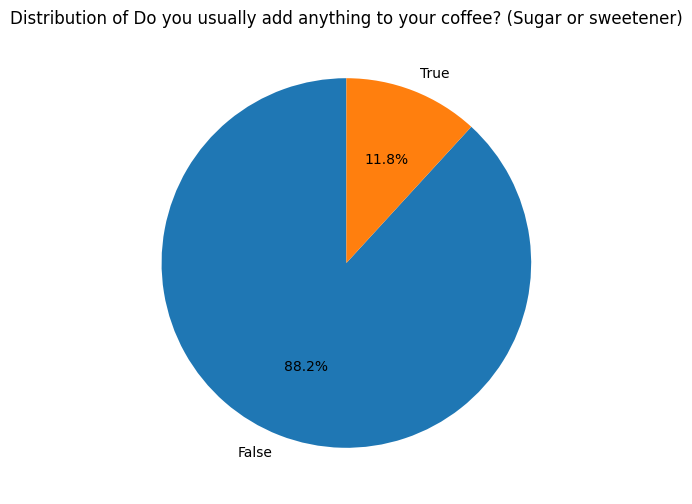

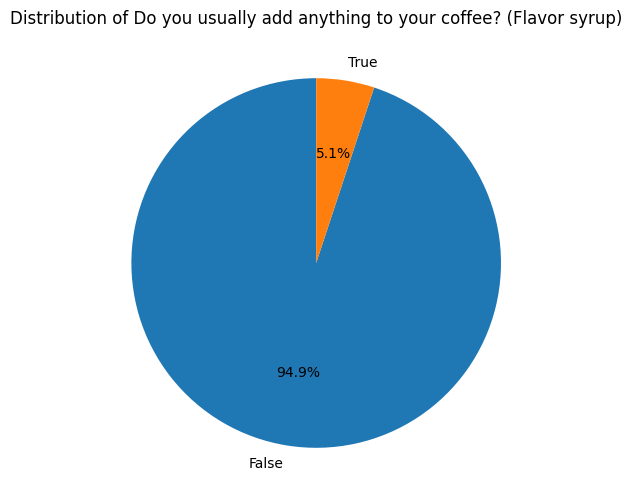

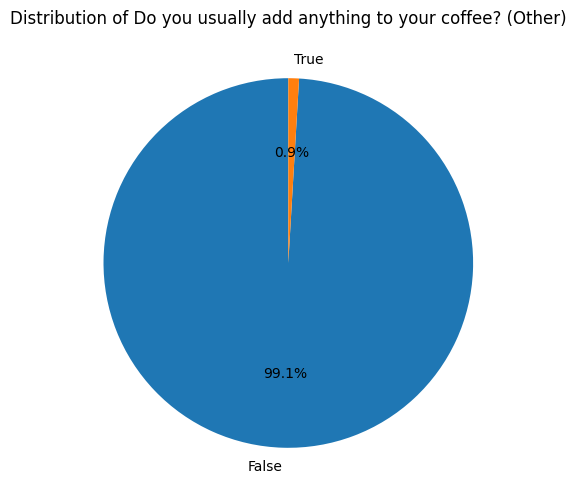

In [100]:
for column in boolean_columns:
  plt.figure(figsize=(12, 6))
  plt.title(f'Distribution of {column}')

  # Count the occurrences of each unique value in the boolean column
  value_counts = df[column].value_counts()

  # Create a pie chart
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

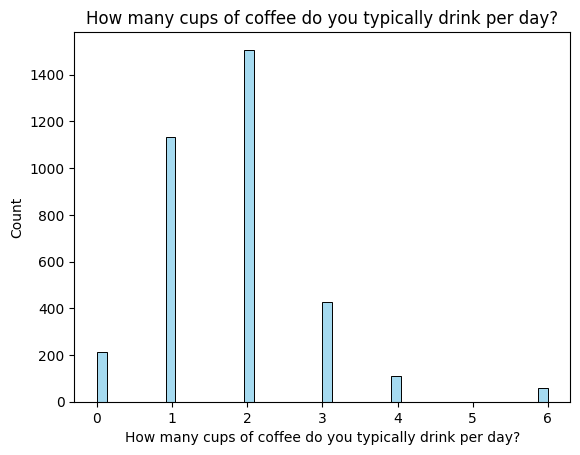

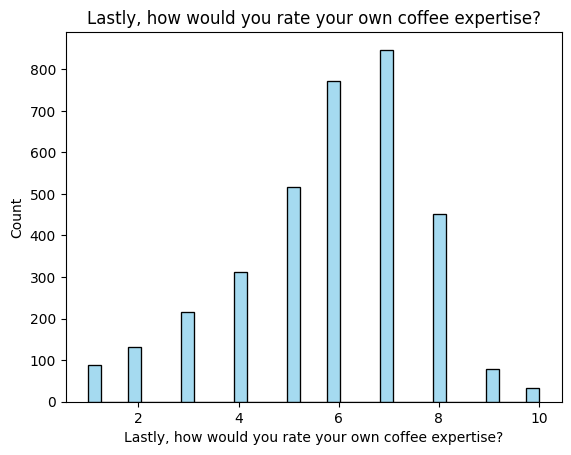

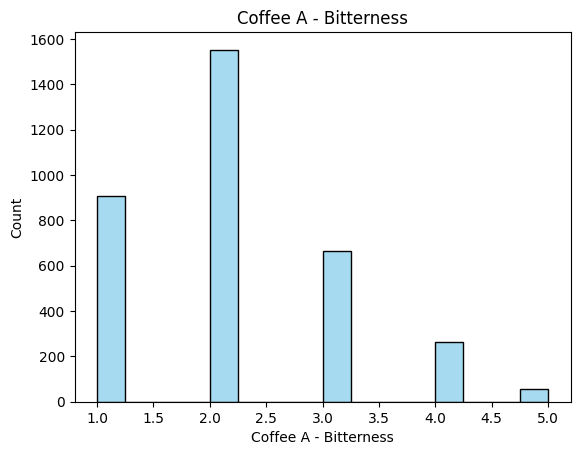

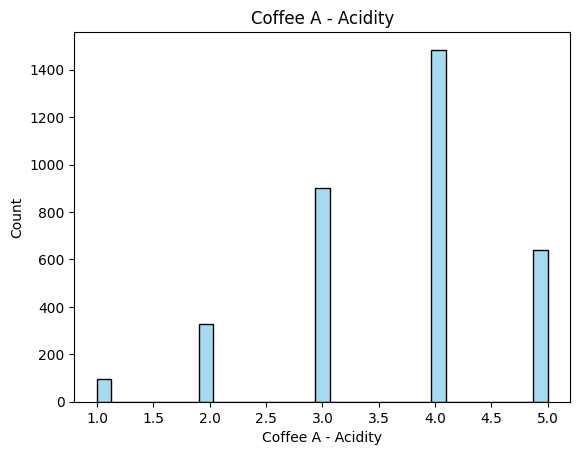

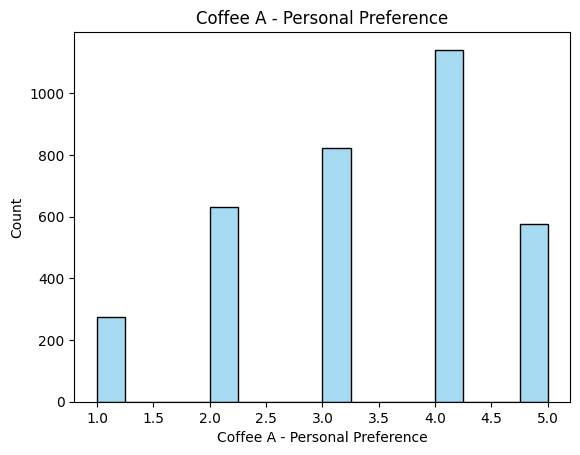

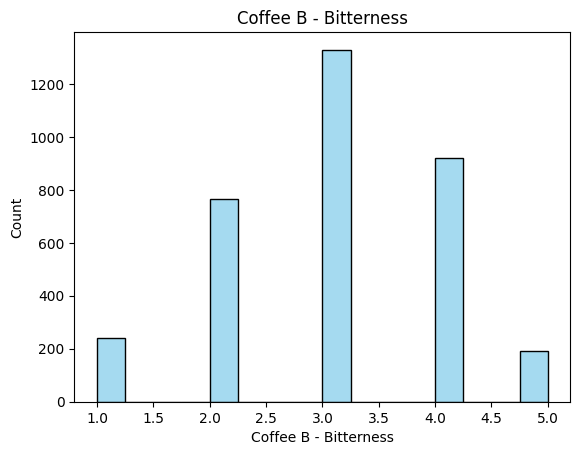

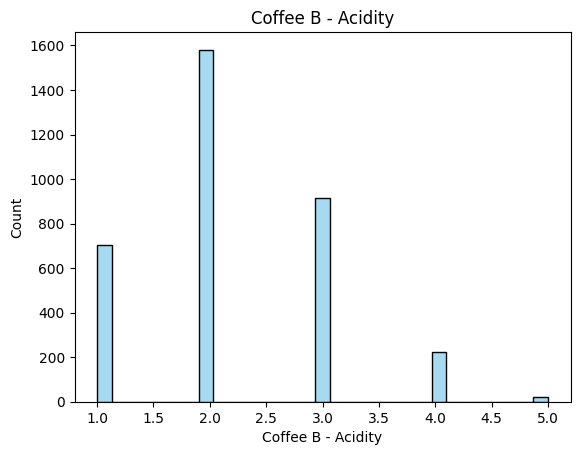

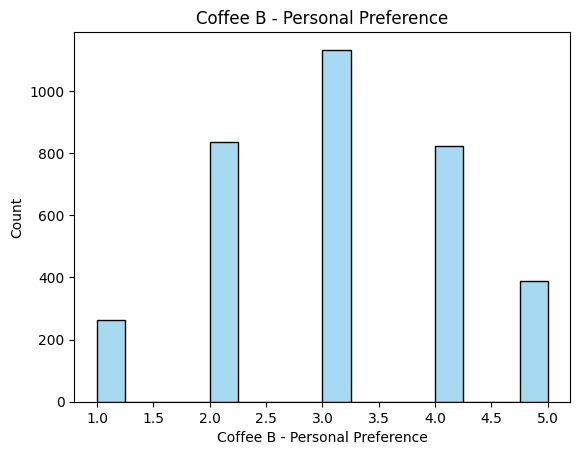

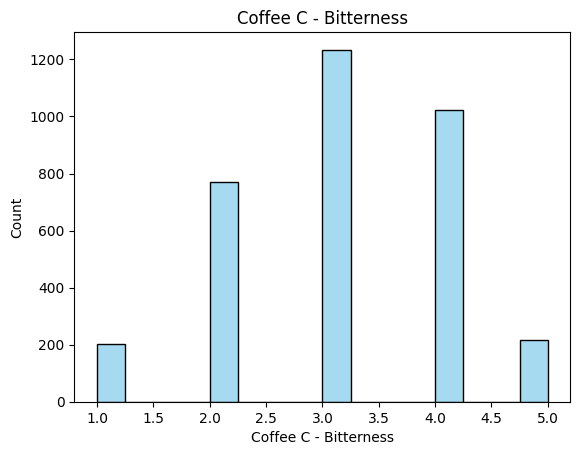

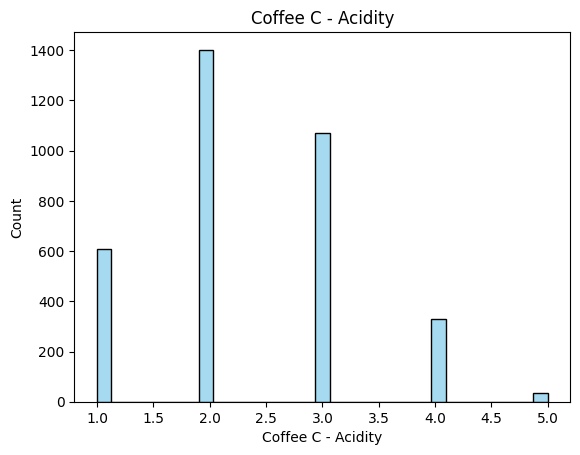

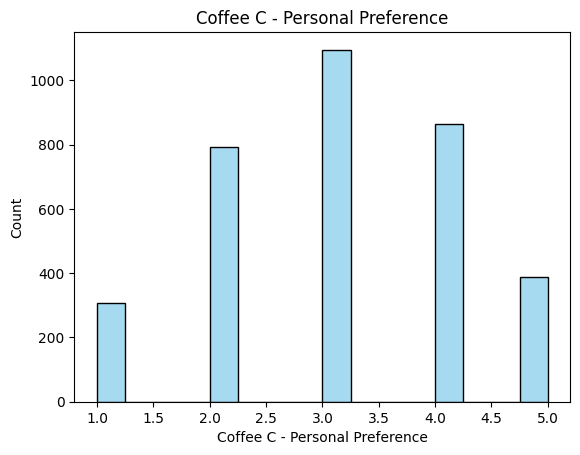

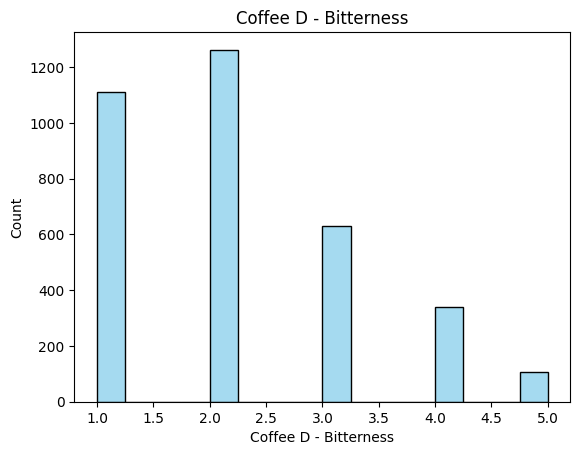

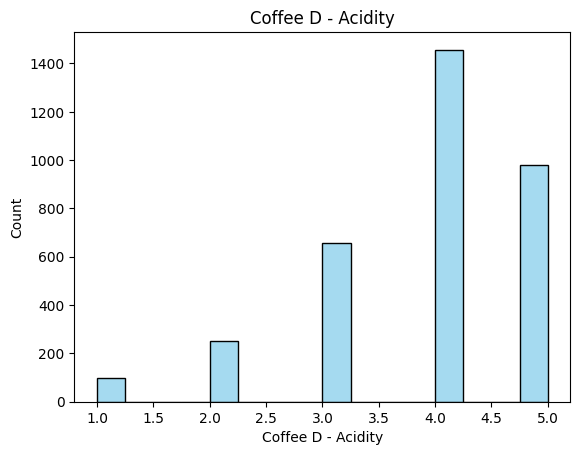

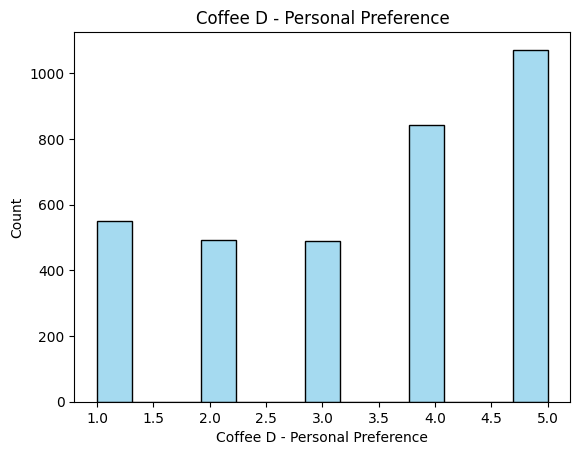

In [101]:
for column in numeric_columns:
  sns.histplot(df[column], color='skyblue')
  plt.title(f'{column}')
  plt.show()

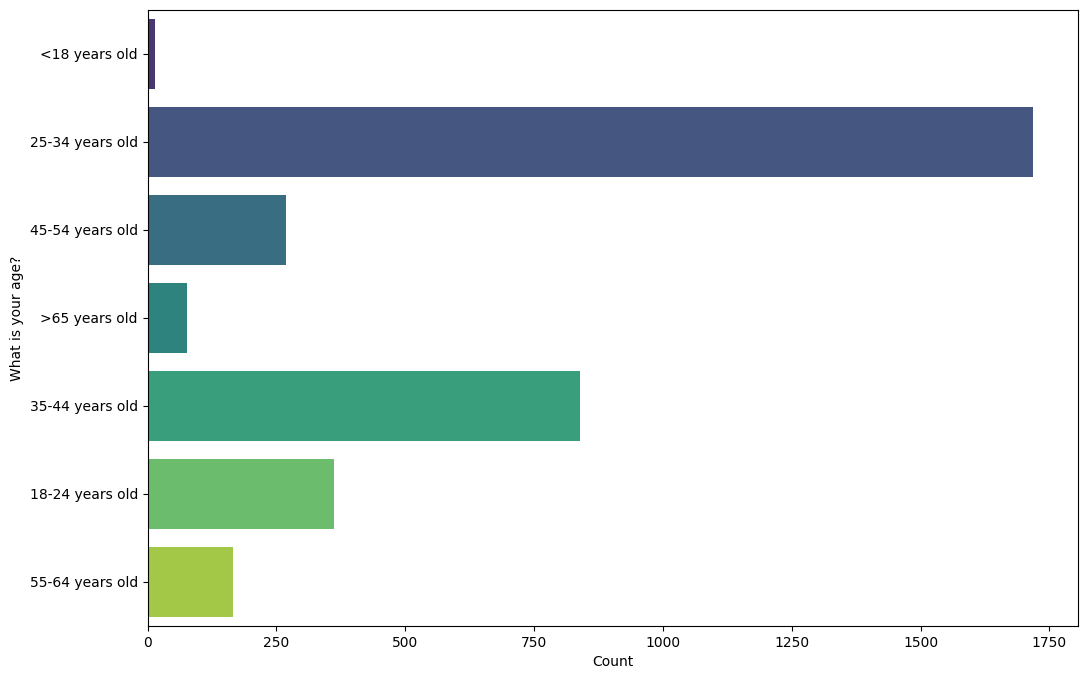

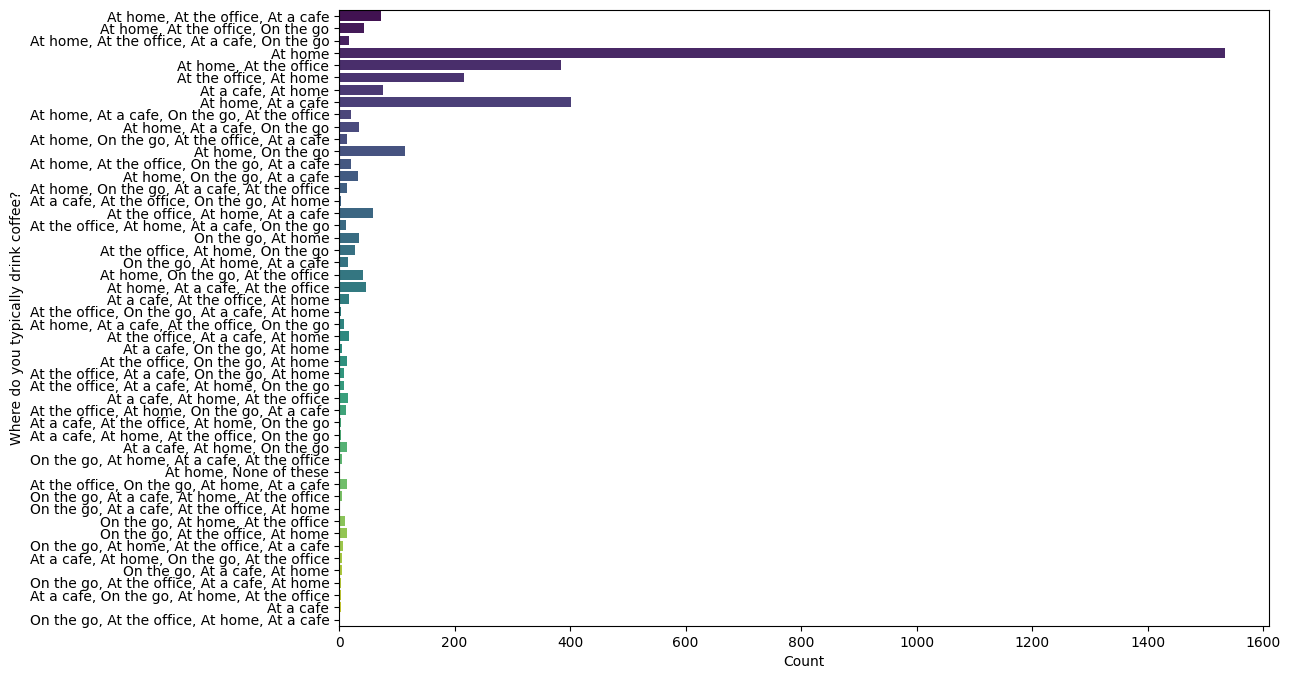

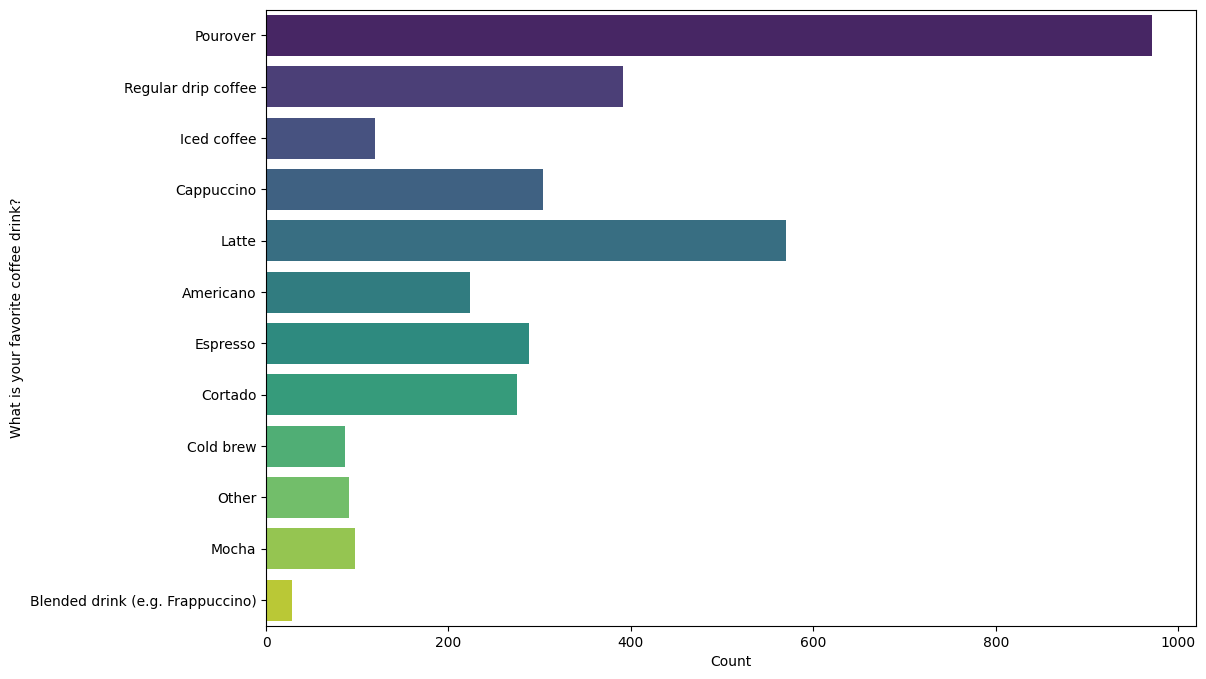

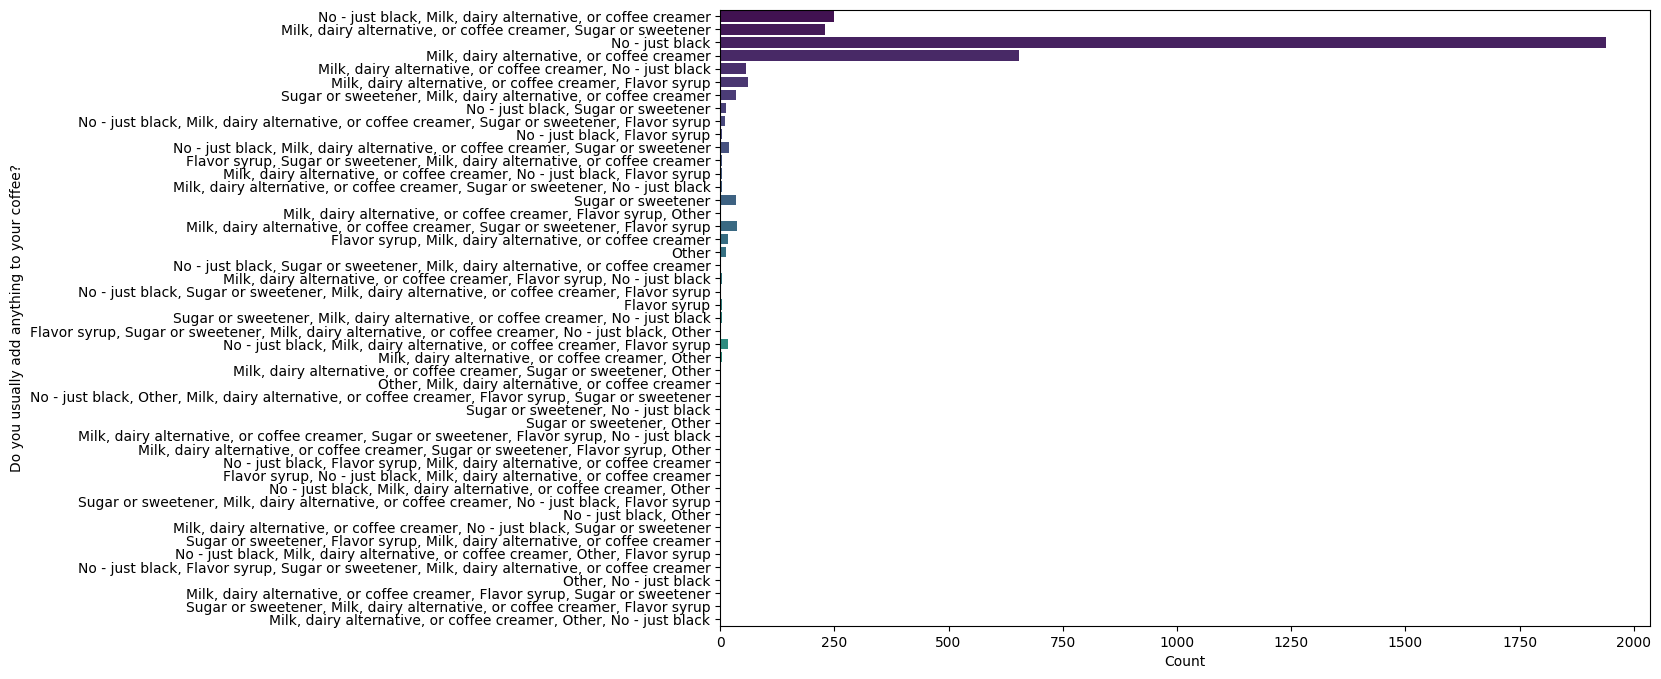

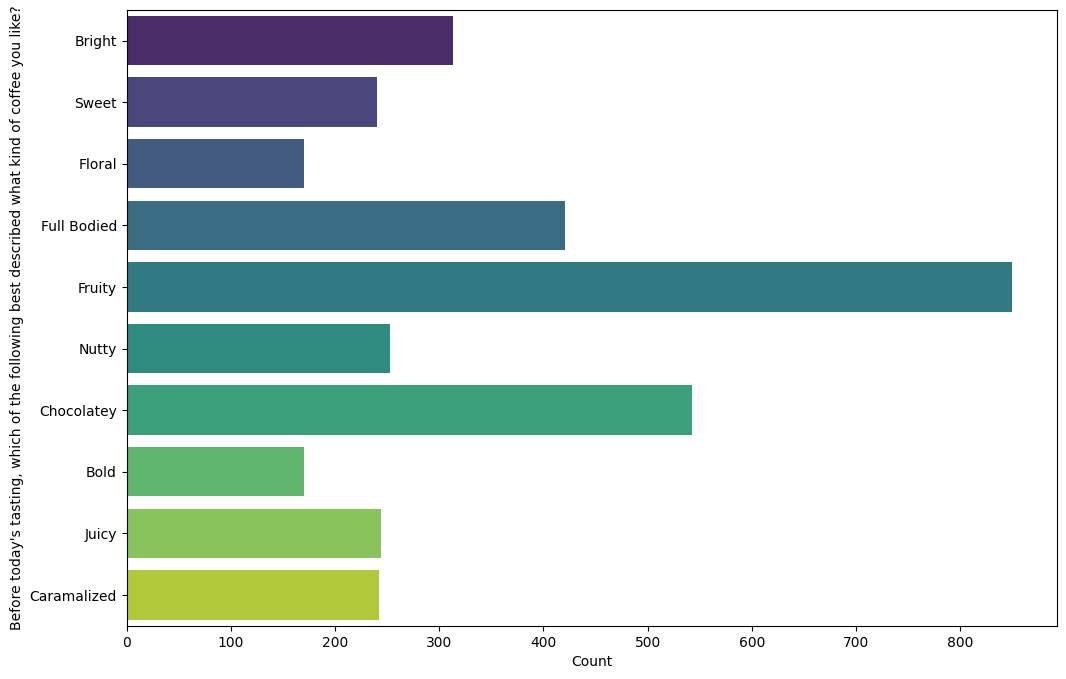

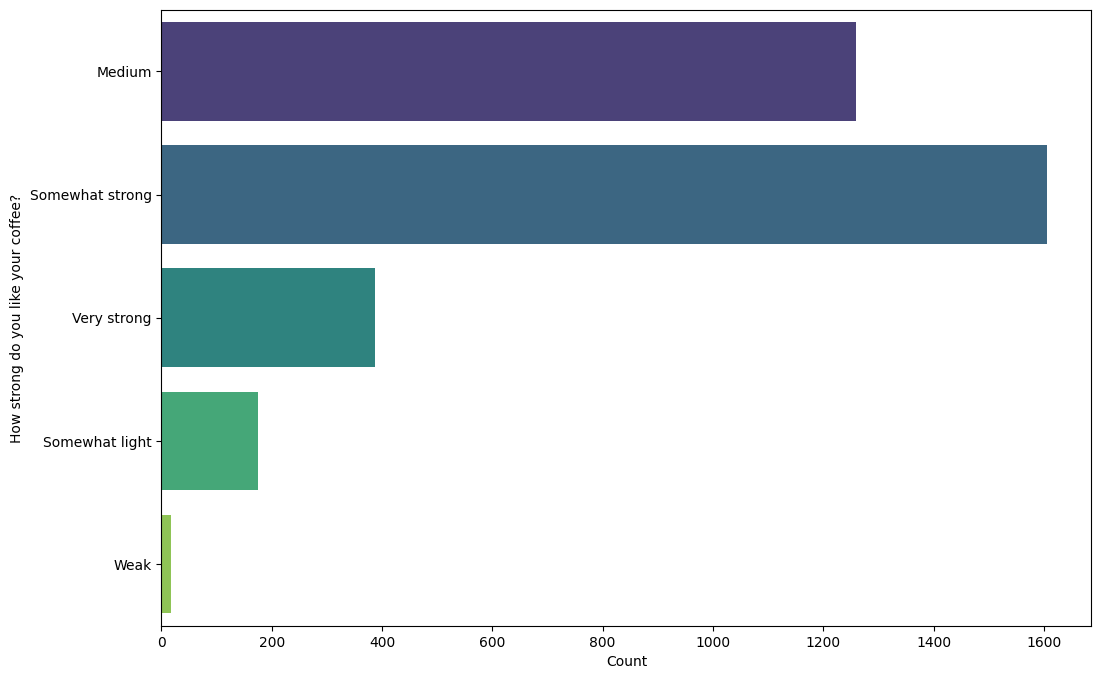

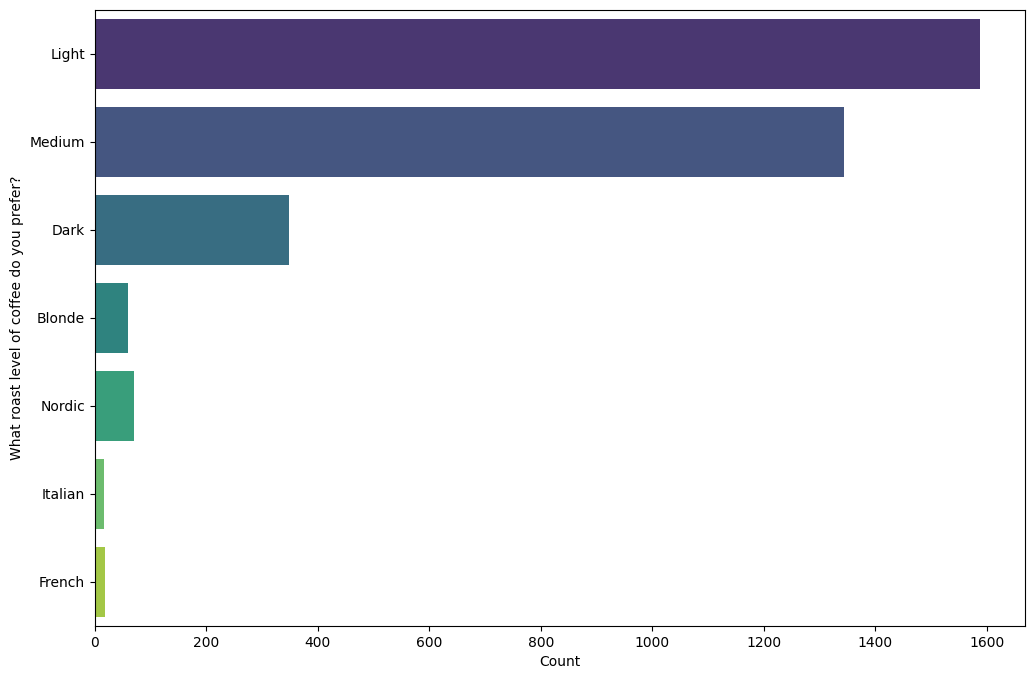

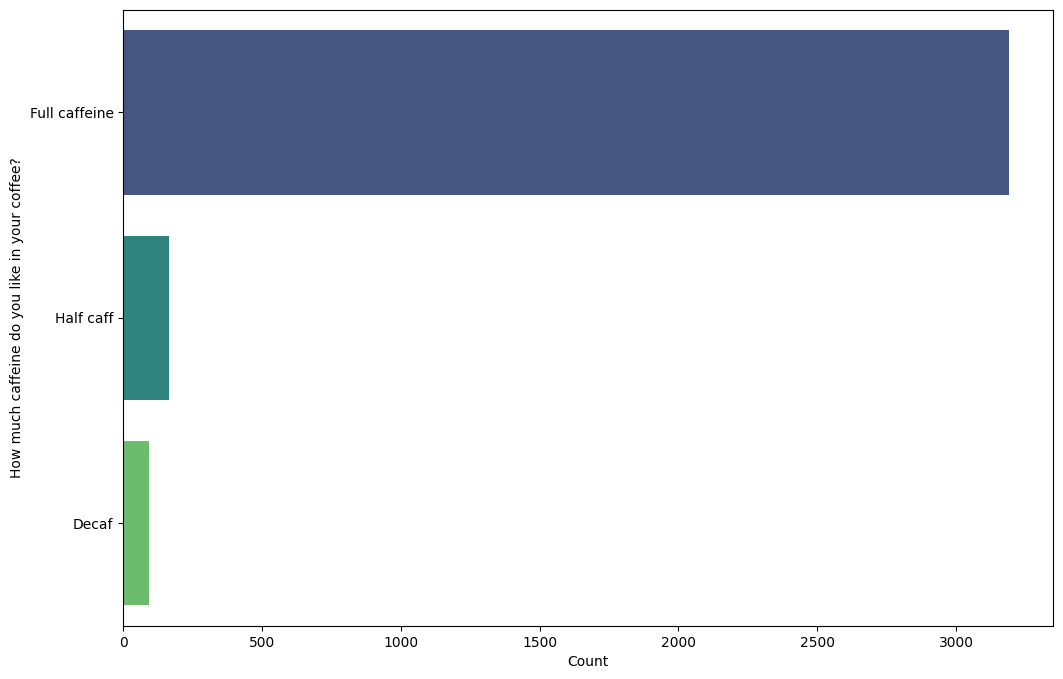

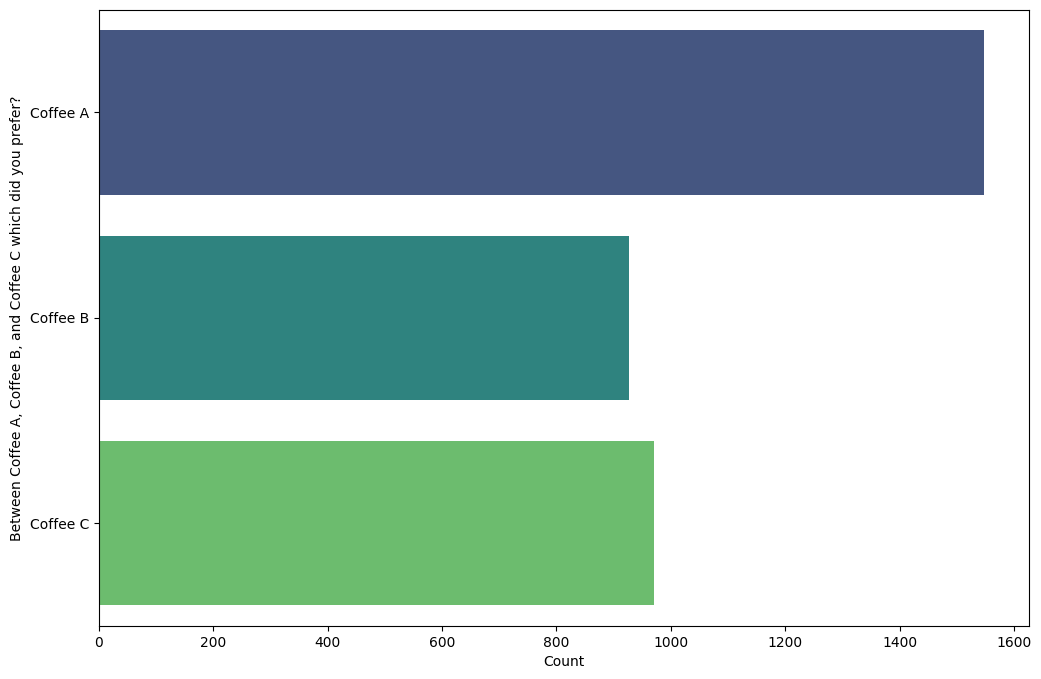

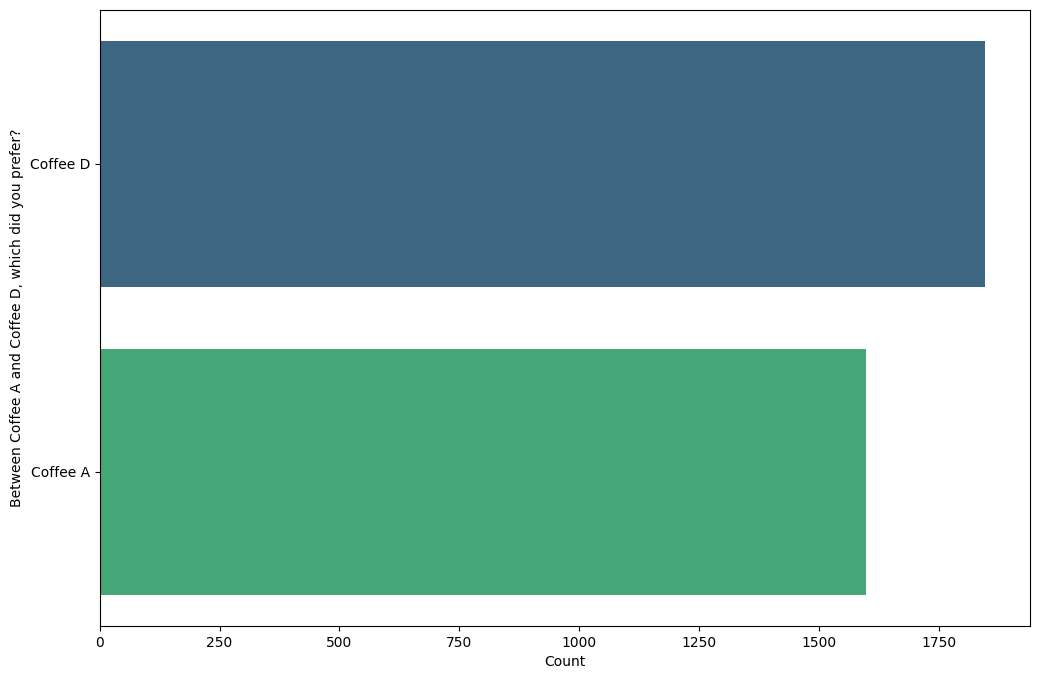

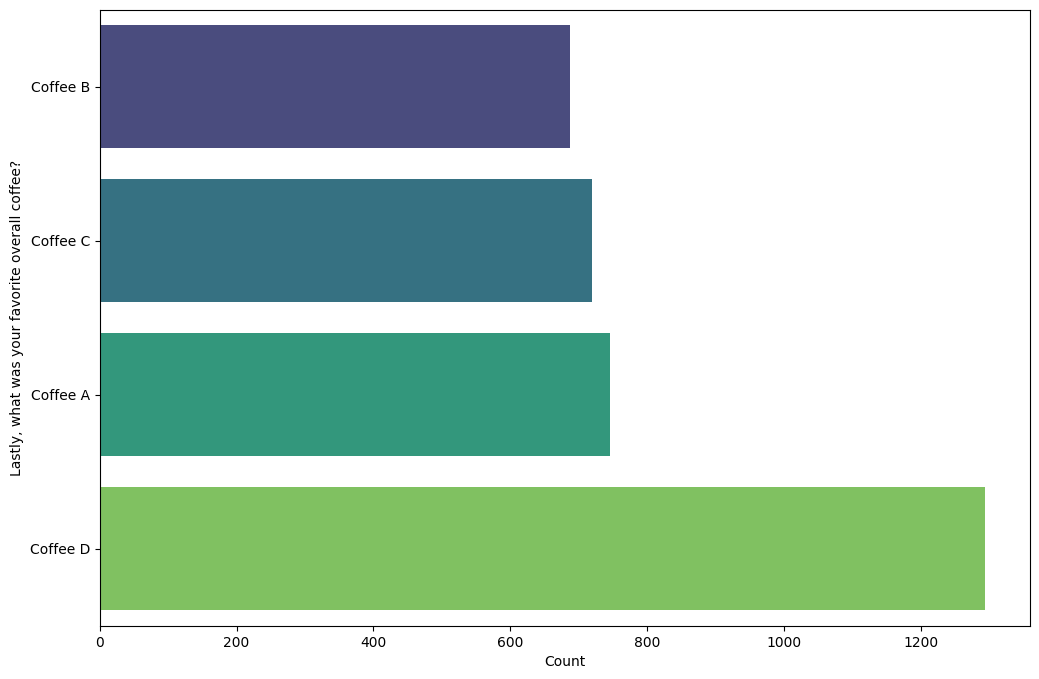

In [102]:
for column in string_columns:
  # Create a countplot
  plt.figure(figsize=(12, 8))
  sns.countplot(data=df, y=column, palette='viridis')
  plt.xlabel('Count')
  plt.show()